In [1]:
# Packages you will need

import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
import skimage as ski

import skimage.io
import skimage.transform

import scipy.fftpack as spfft  # for discrete cosine transform

from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Original size:  (292, 228)
Rescaled size:  (53, 41)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Rescaled image')

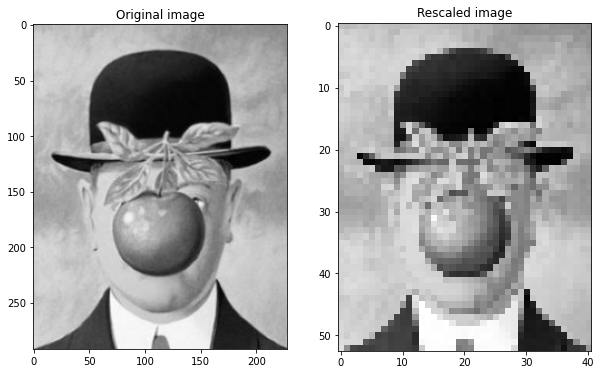

In [2]:
# import image and rescale

img_path = "/content/drive/MyDrive/Colab Notebooks/amath 582 lecture notes/reports /5/SonOfMan.png"

# read image
img_og = ski.io.imread(img_path)

# convert to grayscale and visualize
img_og = ski.color.rgb2gray(img_og)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img_og, cmap="gray")
ax[0].set_title("Original image")

print("Original size: ", img_og.shape)

# resize image
img = ski.transform.rescale(img_og, 0.18, anti_aliasing=False)

print("Rescaled size: ", img.shape)

ax[1].imshow(img, cmap="gray")
ax[1].set_title("Rescaled image")

In [3]:
# constrauct forward and inverse DCT matrices

# construct DCT matrix
def construct_DCT_Mat(Nx, Ny):

    # input : Nx number of columns of image
    #         Ny number of rows of image

    # output: D DCT matrix mapping image.flatten() to
    #         DCT(image).flatten()

    Dx = spfft.dct(np.eye(Nx), axis=0, norm="ortho")

    Dy = spfft.dct(np.eye(Ny), axis=0, norm="ortho")

    D = np.kron(Dy, Dx)

    return D


# construct inverse DCT matrix
def construct_iDCT_Mat(Nx, Ny):

    # input : Nx number of columns of image
    #         Ny number of rows of image

    # output: iD iDCT matrix mapping DCT(image).flatten() to
    #         image.flatten()

    Dx = spfft.idct(np.eye(Nx), axis=0, norm="ortho")

    Dy = spfft.idct(np.eye(Ny), axis=0, norm="ortho")

    D = np.kron(Dy, Dx)

    return D

# Task 1 
> Image Compression

Text(0.5, 1.0, 'DCT coefficients')

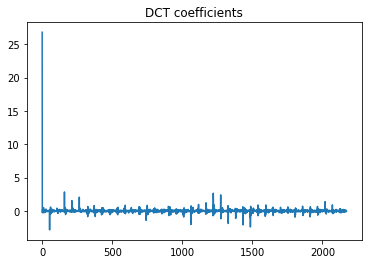

In [4]:
Nx = img.shape[0]
Ny = img.shape[1]
N = Nx * Ny

# vec(F)
vec_F = img.flatten()

# two DCT matrices
D = construct_DCT_Mat(Nx, Ny)
D_inv = construct_iDCT_Mat(Nx, Ny)

# vec(DCT(F))
f_DCT = np.dot(D, vec_F)

plt.plot(f_DCT)
plt.title("DCT coefficients")

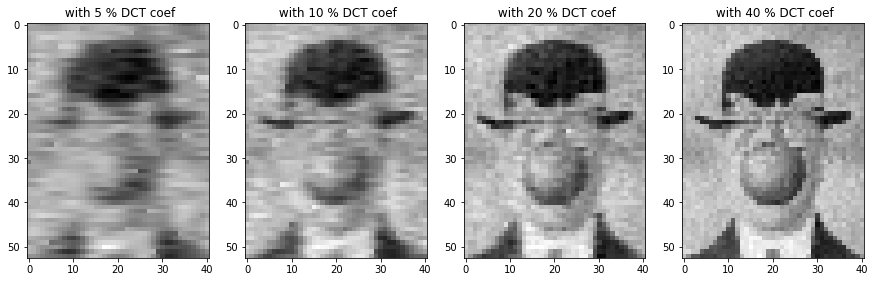

In [5]:
# iterate each wanted percentage of DCT coeffs
# and reconstrct image
percentage = [0.05, 0.1, 0.2, 0.4]
idx = np.abs(f_DCT).argsort()
idx = idx[::-1]
fig, ax = plt.subplots(1, len(percentage), figsize=(15, 15))
for ii, i in enumerate(percentage):
    f_thres = [f_DCT[j] if j in idx[: int(i * N)] else 0 for j in range(N)]
    result = np.dot(D_inv, f_thres).reshape(Nx, Ny)
    ax[ii].imshow(result, cmap="gray")
    ax[ii].set_title(f" with {100*i:0.0f} % DCT coef")

# Task 2
>Compressed Image Recovery

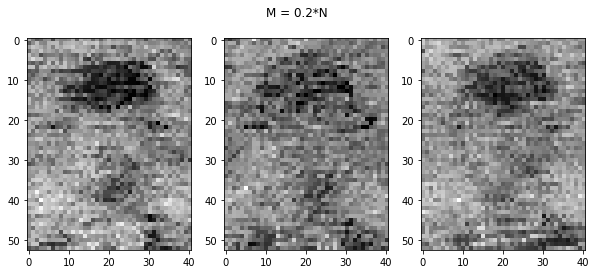

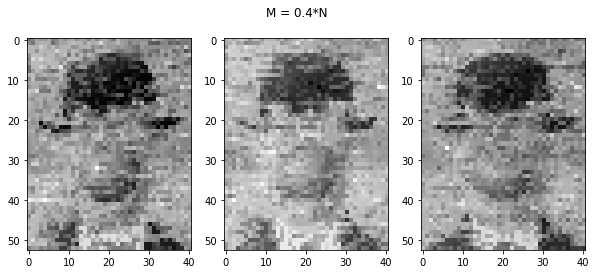

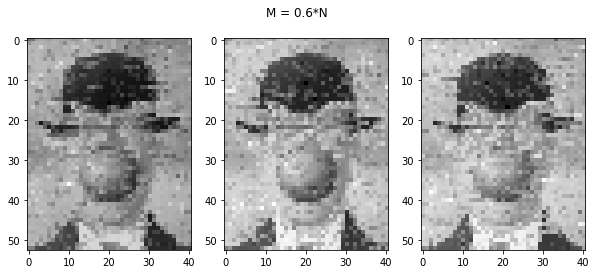

In [ ]:
M = [0.2, 0.4, 0.6]
for i in M:
    fig, ax = plt.subplots(1, 3, figsize=(10, 4))
    for j in range(3):
        rng = np.random.default_rng(seed=j + 1)
        rand_ = rng.choice(np.eye(N), size=int(i * N), replace=False)
        B = rand_
        y = np.dot(B, vec_F)

        A = np.dot(B, D_inv)

        x_l1 = cvx.Variable(N)

        tol = 10**-2

        objective_l1 = cvx.Minimize(cvx.norm(x_l1, 1))
        constraints_l1 = [-tol <= A @ x_l1 - y, A @ x_l1 - y <= tol]
        prob_l1 = cvx.Problem(objective_l1, constraints_l1)

        prob_l1.solve(verbose=True, reltol=1e-2)
        ax[j].imshow(np.dot(D_inv, x_l1.value).reshape(Nx, Ny), cmap="gray")
    fig.suptitle(f"M = {i:0.1f}*N")

# Task 3
>A Mysterious Image

In [ ]:
y = np.load(
    "/content/drive/MyDrive/Colab Notebooks/amath 582 lecture notes/reports /5/y.npy"
)
B = np.load(
    "/content/drive/MyDrive/Colab Notebooks/amath 582 lecture notes/reports /5/B.npy"
)


Nx, Ny = 50, 50
N = Nx * Ny

D_inv = construct_iDCT_Mat(Nx, Ny)

A = np.dot(B, D_inv)

x_l1 = cvx.Variable(N)

tol = 10**-2

objective_l1 = cvx.Minimize(cvx.norm(x_l1, 1))
constraints_l1 = [-tol <= A @ x_l1 - y, A @ x_l1 - y <= tol]
prob_l1 = cvx.Problem(objective_l1, constraints_l1)

prob_l1.solve(verbose=False, solver="CVXOPT", max_iter=1000, reltol=1e-2, featol=1e-2)


plt.imshow(np.dot(D_inv, x_l1.value).reshape(Nx, Ny), cmap="gray")

In [ ]:
#!pip install black[jupyter]
!black /content/drive/MyDrive/Colab\ Notebooks/amath\ 582\ lecture\ notes/reports\ /5/hw5.ipynb

All done! ✨ 🍰 ✨
1 file left unchanged.
